In [ ]:
# notebooks/data_exploration.ipynb

In [1]:
# Cell 1: Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Cell 2: Load Data
df = pd.read_csv("../data/reviews.csv")
print("Shape:", df.shape)
df.head()

Shape: (1200000, 9)


,sno,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,0,de_0203609,product_de_0865382,reviewer_de_0267719,1,Armband ist leider nach 1 Jahr kaputt gegangen,Leider nach 1 Jahr kaputt,de,sports
1,1,de_0559494,product_de_0678997,reviewer_de_0783625,1,In der Lieferung war nur Ein Akku!,EINS statt ZWEI Akkus!!!,de,home_improvement
2,2,de_0238777,product_de_0372235,reviewer_de_0911426,1,"Ein Stern, weil gar keine geht nicht. Es hande...",Achtung Abzocke,de,drugstore
3,3,de_0477884,product_de_0719501,reviewer_de_0836478,1,"Dachte, das wären einfach etwas festere Binden...",Zu viel des Guten,de,drugstore
4,4,de_0270868,product_de_0022613,reviewer_de_0736276,1,Meine Kinder haben kaum damit gespielt und nac...,Qualität sehr schlecht,de,toy


In [3]:
# Cell 3: Check for Missing Values
missing = df.isnull().sum()
print("Missing values per column:\n", missing)

Missing values per column:
 sno                  0
review_id            0
product_id           0
reviewer_id          0
stars                0
review_body          0
review_title        43
language             0
product_category     0
dtype: int64


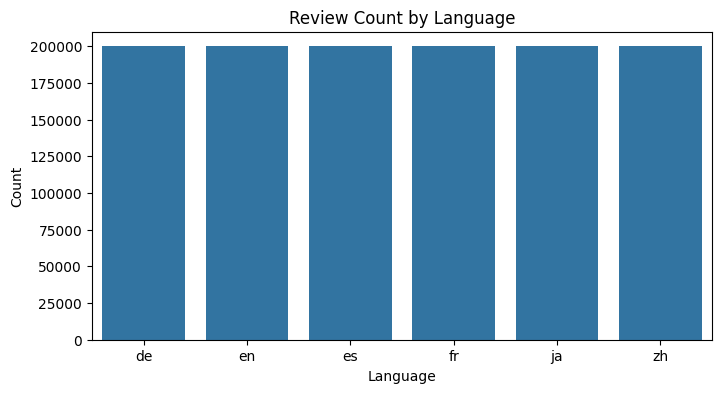

In [4]:
# Cell 4: Language Distribution
lang_counts = df['language'].value_counts()
plt.figure(figsize=(8,4))
sns.barplot(x=lang_counts.index, y=lang_counts.values)
plt.title("Review Count by Language")
plt.xlabel("Language")
plt.ylabel("Count")
plt.show()

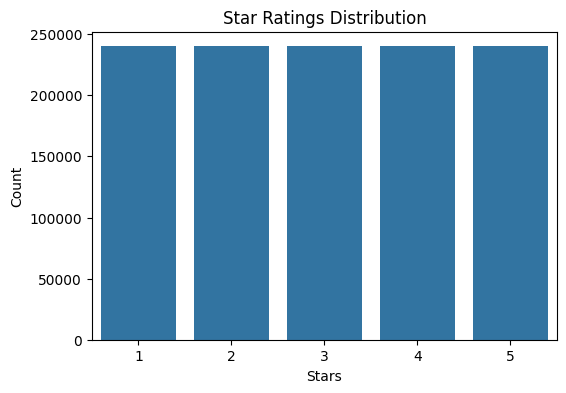

In [5]:
# Cell 5: Star Ratings Distribution
plt.figure(figsize=(6,4))
sns.countplot(x='stars', data=df, order=sorted(df['stars'].unique()))
plt.title("Star Ratings Distribution")
plt.xlabel("Stars")
plt.ylabel("Count")
plt.show()

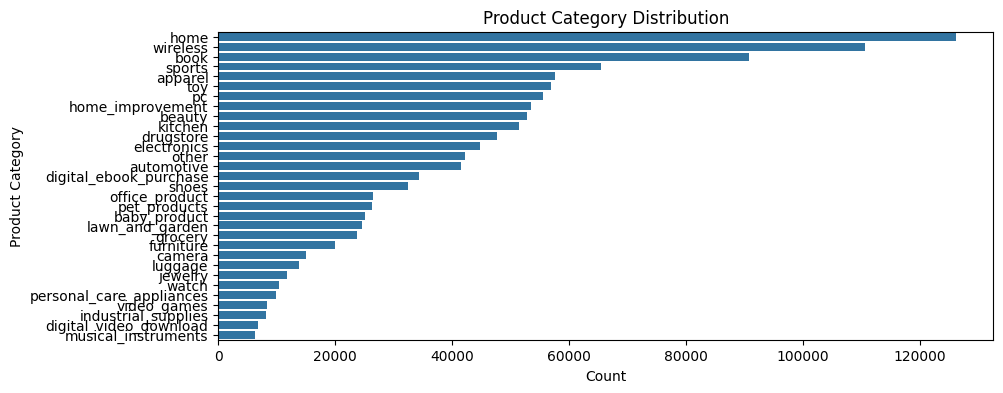

In [6]:
# Cell 6: Product Category Distribution
plt.figure(figsize=(10,4))
sns.countplot(y='product_category', data=df, order=df['product_category'].value_counts().index)
plt.title("Product Category Distribution")
plt.xlabel("Count")
plt.ylabel("Product Category")
plt.show()

In [7]:
# Cell 7: Check for Duplicates
duplicates = df.duplicated().sum()
print("Number of duplicate rows:", duplicates)

Number of duplicate rows: 0


In [8]:
# Cell 8: Basic Text Length Stats
df['review_body_length'] = df['review_body'].astype(str).apply(len)
print(df['review_body_length'].describe())

count    1.200000e+06
mean     1.416392e+02
std      1.471622e+02
min      1.100000e+01
25%      4.800000e+01
50%      1.010000e+02
75%      1.770000e+02
max      3.908000e+03
Name: review_body_length, dtype: float64


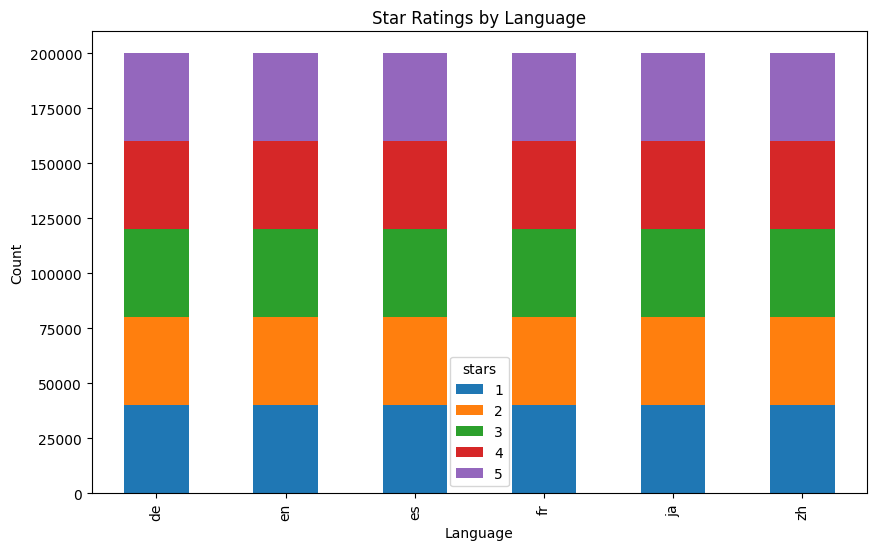

In [10]:
# Cell 9: Star Ratings by Language
pivot = pd.crosstab(df['language'], df['stars'])
pivot.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title("Star Ratings by Language")
plt.xlabel("Language")
plt.ylabel("Count")
plt.show()

In [11]:
# Cell 10: Markdown Summary Cell
"""
# Data Exploration Summary

- Dataset shape: {}
- Languages present: {}
- Star rating distribution: {}
- Product categories: {}

## Observations

""".format(df.shape, df['language'].unique(), df['stars'].value_counts().to_dict(), df['product_category'].unique())

"\n# Data Exploration Summary\n\n- Dataset shape: (1200000, 10)\n- Languages present: ['de' 'en' 'es' 'fr' 'ja' 'zh']\n- Star rating distribution: {1: 240000, 2: 240000, 3: 240000, 4: 240000, 5: 240000}\n- Product categories: ['sports' 'home_improvement' 'drugstore' 'toy' 'baby_product'\n 'lawn_and_garden' 'electronics' 'book' 'home' 'wireless' 'pc' 'shoes'\n 'automotive' 'furniture' 'beauty' 'digital_ebook_purchase' 'kitchen'\n 'personal_care_appliances' 'office_product' 'apparel' 'video_games'\n 'pet_products' 'digital_video_download' 'musical_instruments' 'other'\n 'watch' 'luggage' 'jewelry' 'camera' 'industrial_supplies' 'grocery']\n\n## Observations\n\n"